# EDA 
Code is adapted from the following sources: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/xchmiao/detailed-data-exploration-in-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df_train=pd.read_csv('train.csv')
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,136500
1,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,900,6,2009,WD,120000
2,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2009,WD,253000
3,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,170000
4,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2006,ConLw,144000
5,60,RL,NaN,10364,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,168000
6,60,RL,96.0,13262,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,290000
7,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,210000
8,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,220000
9,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,1,2008,WD,55000


In [3]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

In [4]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,804.000000,647.000000,804.000000,804.000000,804.000000,804.000000,804.000000,800.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,57.300995,68.361669,10016.707711,5.992537,5.646766,1969.798507,1983.022388,100.633750,434.905473,57.369403,...,95.313433,43.727612,23.758706,3.034826,16.296020,1.353234,24.291045,6.000000,2007.901741,175324.466418
std,42.490101,22.037801,7721.425853,1.311865,1.084064,28.519451,20.595723,179.789293,415.951945,187.092685,...,129.461789,61.361527,62.508372,27.962638,54.423224,24.613164,212.262602,2.612357,1.316264,70035.485203
min,20.000000,21.000000,1300.000000,2.000000,3.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35000.000000
25%,20.000000,57.000000,7513.500000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,70.000000,9469.500000,6.000000,5.000000,1971.000000,1991.000000,0.000000,388.500000,0.000000,...,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158725.000000
75%,70.000000,80.000000,11438.000000,7.000000,6.000000,1997.250000,2002.000000,150.750000,697.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2009.000000,206225.000000
max,190.000000,155.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1224.000000,2257.000000,1526.000000,...,690.000000,365.000000,368.000000,508.000000,291.000000,576.000000,4500.000000,12.000000,2010.000000,615000.000000


## 1. Analysing 'SalePrice'
This is the purpose of this assignment. We need to understand the sales values in order to get a feel for how we are going to predict it.

In [5]:
df_train['SalePrice'].describe()

count       804.000000
mean     175324.466418
std       70035.485203
min       35000.000000
25%      129500.000000
50%      158725.000000
75%      206225.000000
max      615000.000000
Name: SalePrice, dtype: float64

* Minimum price is larger than 0 - meaning there are no obvious errors or missing values

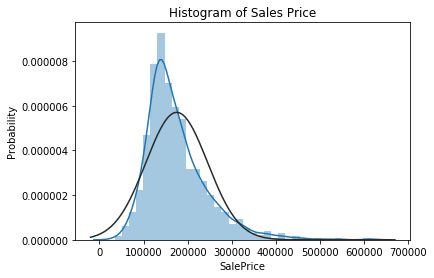

In [6]:
fig, ax= plt.subplots()
sns.distplot(df_train['SalePrice'], fit=norm);
ax.set_ylabel('Probability')
ax.set_title('Histogram of Sales Price')
fig.savefig('SalePriceDist.png')

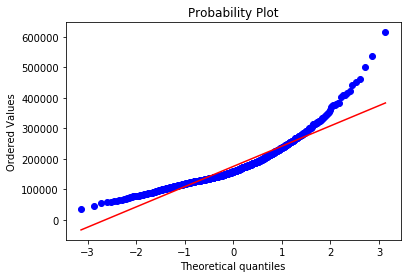

In [7]:
# Probability plot of sale price
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
fig.savefig('SalePriceProb.png')

* Does not follow a normal distribution
* Large positive skewness
* Signs of peakedness

In [8]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.581383
Kurtosis: 4.276728


* As expected, this confirms our thoughts of skewness and kurtosis. Might be worth comparing to values which are considered 'skewed' or 'peaked'

## 2. Bivariate Analysis: 'SalePrice' with Other Predictors

** It is probably better to put section 3 before this part. Therefore we can see we used the correlation matrix to find these predictors and therefore researched them further.**

We take a think about the variables which are likely to contribute a lot to the prediction of house prices. Some of the potential features which may contribute to predictions include:
* OverallQual
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

These are the ones we will focus on the EDA within our report. However, we should also consider more in the Appendix too.

### 2.1 Relationship with Numerical Variables

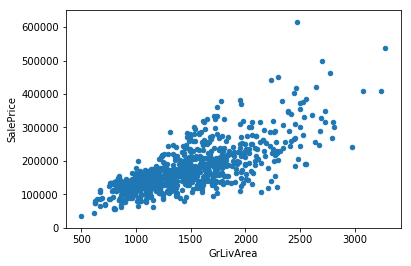

In [9]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,650000));

* Appears to be a linear relationship between SalePrice and GrLivArea
* However, the variance(? not sure on this word - I forgot) seems to increase for increasing GrLivArea

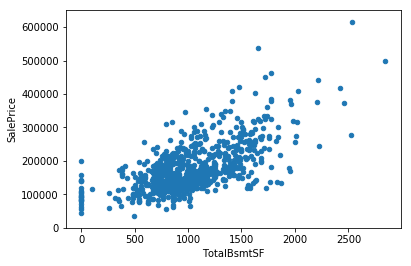

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,650000));

* Also a relationship between SalePrice and TotalBsmtSF
* However, this appears to be either a strong linear relationship or possibly an exponential one. Will consider both in my feature engineering
* We also notice that there are several observations in the training data where there are not basements

### 2.2 Relationship with Categorical Features

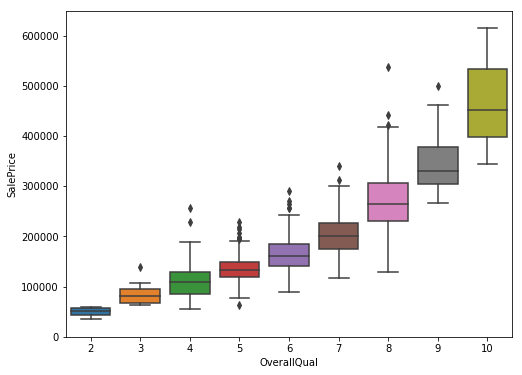

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=650000);

* It appears that SalePrice and OveralQual have a relationship. 
* SalePrices increases with increasing OverallQual which means it could be a good predictor of SalePrice
* Generally, the whiskers on the box plots increase with increasing OverallQual

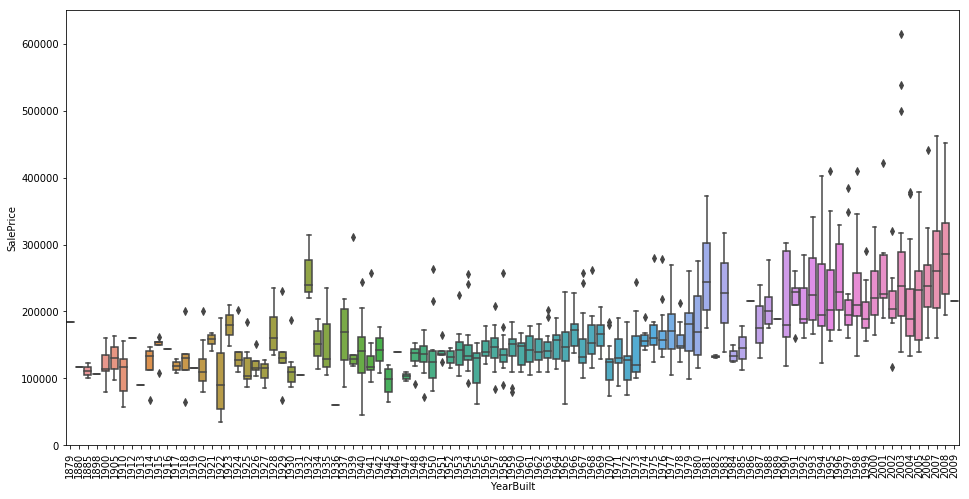

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=650000);
plt.xticks(rotation=90);

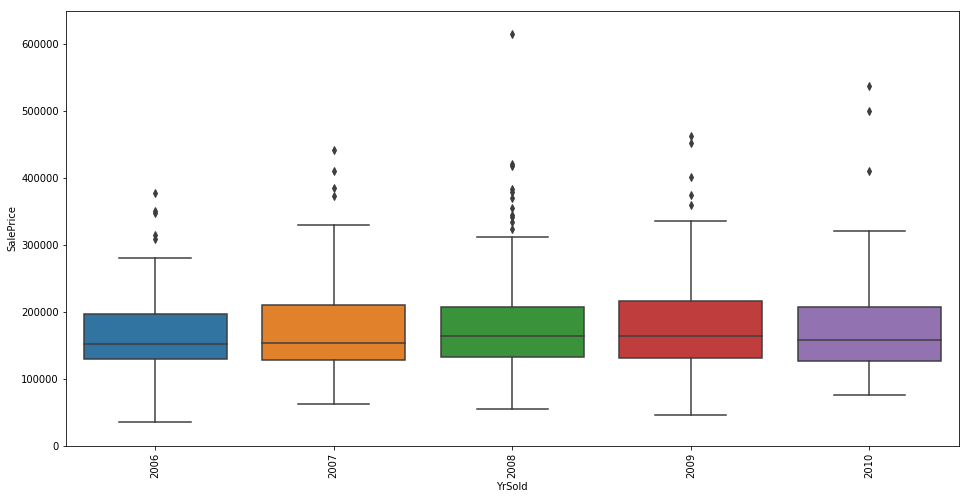

In [13]:
var = 'YrSold'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=650000);
plt.xticks(rotation=90);

* Not as strong relationship as the others but it does appear the SalePrice does indeed increase with YearBuilt
* More variability in this though
* A potential thing to question the data is, do these sales prices remove the effects of inflation?

### 2.3 Summary
We conclude that:
* GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high and possibly even exponential.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

## 3. Finding Relevant Predictors
To find the relevant predictors we will do the following:
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables

### 3.1 Correlation Matrix (Heatmap Style)

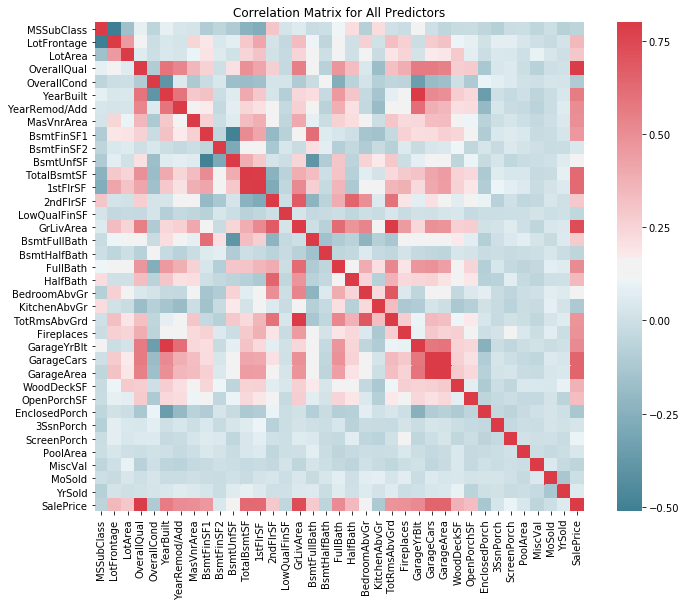

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Correlation Matrix for All Predictors')
sns.heatmap(corrmat, vmax=.8, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
plt.show()
f.savefig('CorrMat.png')

In [15]:
correlation = df_train.corr()

We are looking for boxes which have a dark colour. These represent those the ones which are highly correlated with each other

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are highly correlated, but we can also see many other variables that should be taken into account. That's what we will do next.

### 3.2 'SalePrice' Correlation Matrix

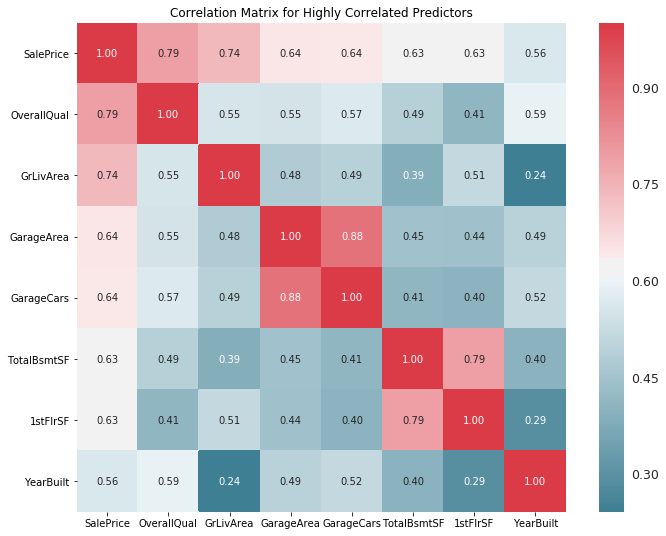

In [16]:
#saleprice correlation matrix
k = 8 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Correlation Matrix for Highly Correlated Predictors')
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap=sns.diverging_palette(220, 10, as_cmap=True), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
f.savefig('CorrSig.png')

Note: not sure what is going on with GarageYrBuilt. Can someone please look at this? Might only have to do an 8 by 8 matrix

The variables most correlated with 'SalePrice' are:
* OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice' as we guessed from our previous analysis
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars').
* 'TotalBsmtSF' and '1stFloor' also seem to be related with each other. We can keep 'TotalBsmtSF' as we've already analysed it
* 'YearBuilt' is slightly correlated with 'SalePrice'. Might have to do some time-series analysis

In [17]:
cor_dict = corrmat['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their absolute correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their absolute correlation with Sale Price:

OverallQual: 	0.7897228907835945
GrLivArea: 	0.7375503565200969
GarageArea: 	0.6445253739340929
GarageCars: 	0.643195376182962
TotalBsmtSF: 	0.6345885570385398
1stFlrSF: 	0.6285216303358372
YearBuilt: 	0.5614482932786612
GarageYrBlt: 	0.5151316904755894
FullBath: 	0.5092401355276177
YearRemod/Add: 	0.5054262606914325
MasVnrArea: 	0.4951885914125633
Fireplaces: 	0.48542160920005023
TotRmsAbvGrd: 	0.47887402922521205
BsmtFinSF1: 	0.46422538901279586
WoodDeckSF: 	0.37313422008199365
LotFrontage: 	0.3447473703877386
HalfBath: 	0.34110886096351767
OpenPorchSF: 	0.32862264572222477
LotArea: 	0.2932118611425772
2ndFlrSF: 	0.29168221606759875
BsmtFullBath: 	0.2774047849420627
BedroomAbvGr: 	0.14249729047826135
EnclosedPorch: 	-0.12842648156917114
BsmtUnfSF: 	0.12298237629876682
KitchenAbvGr: 	-0.11437439409686287
ScreenPorch: 	0.10530208760322503
OverallCond: 	-0.1044303471672508
MSSubClass: 	-0.05967573771

* Probably don't need to include in report. Can be used as our reference for feature engineering

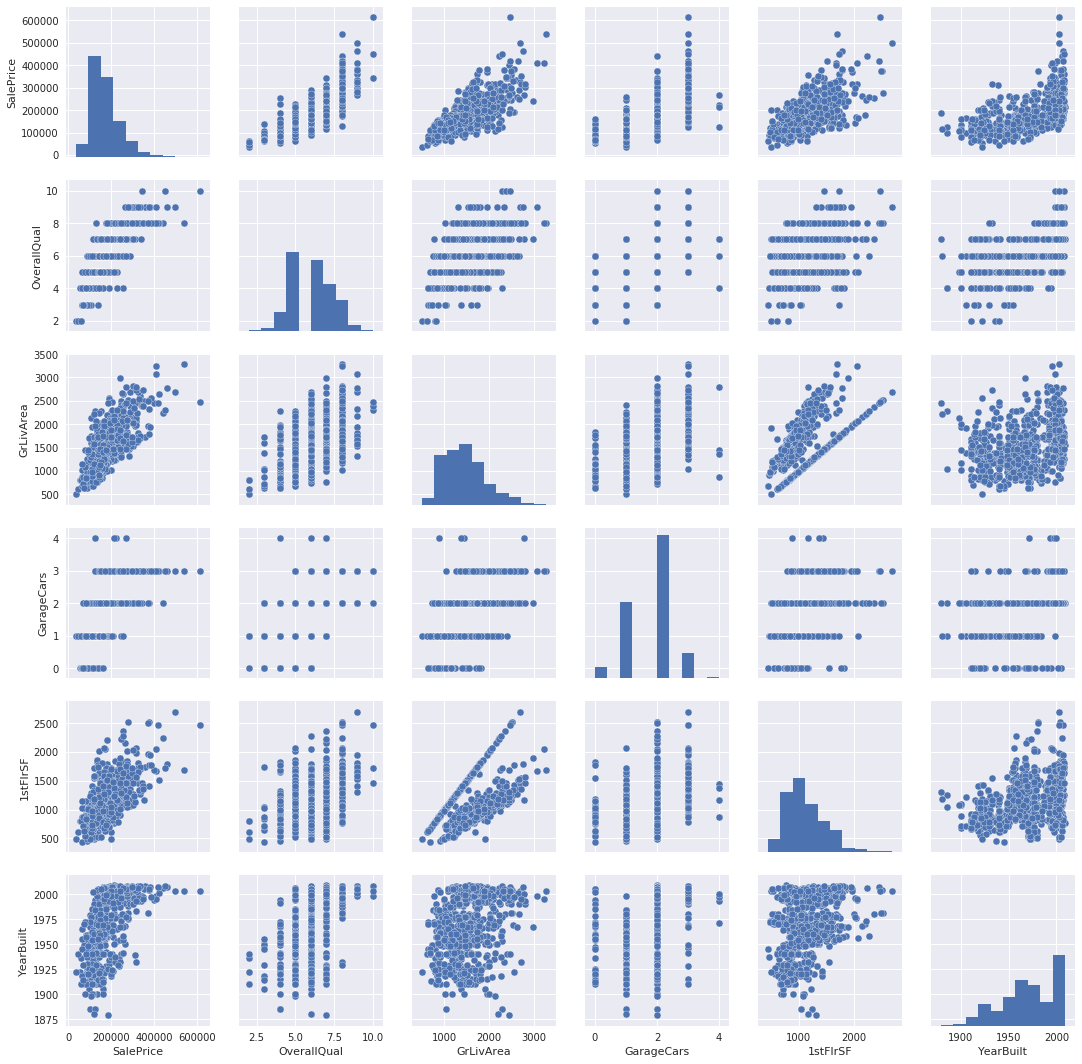

In [18]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()
f.savefig('CorrSig.png')

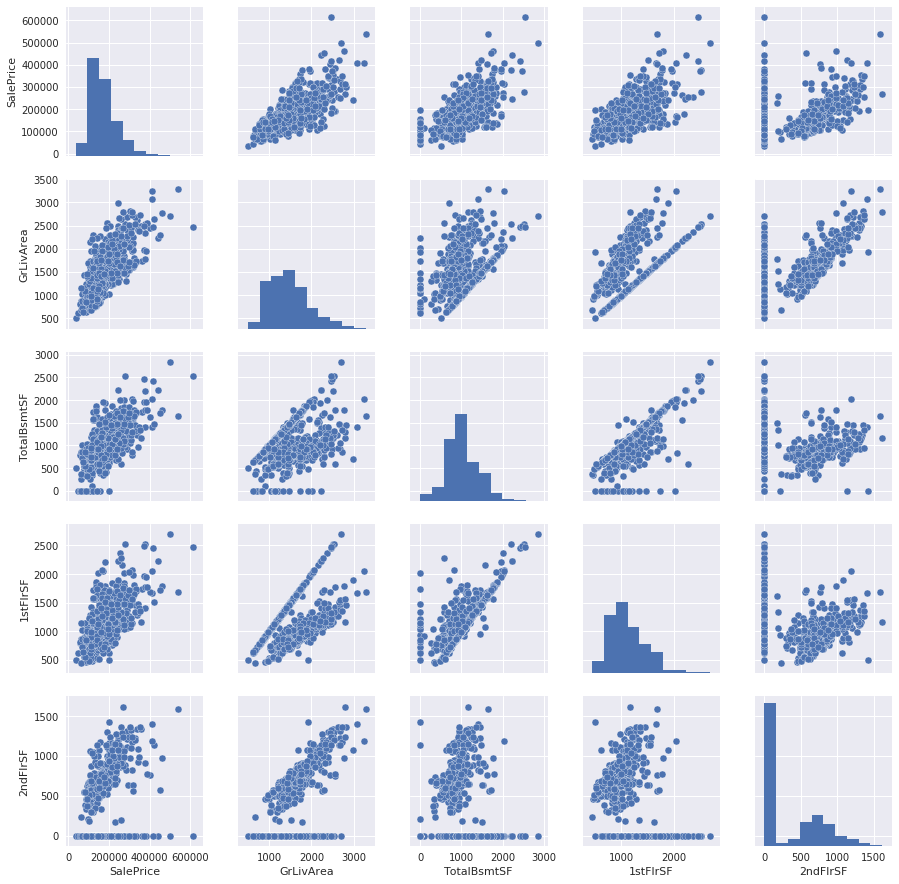

In [19]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

## 4. Missing Data
Important questions when thinking about missing data:
* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [20]:
# missing data
# The higher the percentage, the more data that is missing
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,801,0.996269
MiscFeature,781,0.971393
Alley,749,0.931592
Fence,644,0.800995
FireplaceQu,386,0.480100
LotFrontage,157,0.195274
GarageType,36,0.044776
GarageFinish,36,0.044776
GarageQual,36,0.044776
GarageCond,36,0.044776


* We will consider removing those with a large amount of data missing. Say greater than 20 percent of the data missing
* However, missing values may represent null values (i..e having no fence) rather than a missing value.
* These will be considered further in the data preprocessing section in another workbook

## 5. Outliers
Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots. If we have more time, we can consider the plots we created in QBUS2810 and include them. However, we don't have much space in the report so I'm not sure about that.

### 5.1 Univariate Analysis - 'SalePrice'
We need to find which SalePrice observations can be considered outliers. To do this we will standardise the data by substracting the mean of SalePrice and dividing by the standard deviation of SalePrice. Therefore we will have a mean of 0 and a standard deviation of one for the scaled data points. 

In [21]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.00486673]
 [-1.86199309]
 [-1.71911945]
 [-1.68161512]
 [-1.64768263]
 [-1.62625159]
 [-1.61363584]
 [-1.59053318]
 [-1.58338949]
 [-1.54767108]]

outer range (high) of the distribution:
[[ 3.35289477]
 [ 3.35289477]
 [ 3.46005   ]
 [ 3.51362762]
 [ 3.80907602]
 [ 3.95224969]
 [ 4.0958377 ]
 [ 4.63875754]
 [ 5.18167737]
 [ 6.2818044 ]]


* Low range values are close to one another and are not too far from 0 - this shouldn't be an issue
* Higher values are further from 0 at around 5 and 6. These could potentially be outliers. We will return to this.

### 5.2 Bivariate Analysis - SalePrice with Other Variables

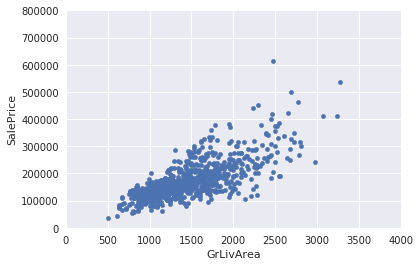

In [22]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', xlim=(0,4000),ylim=(0,800000));

* The top two points which are higher than the others are the 5 and 6 values discussed in the previous section. They still appear to be following the trend, albeit a little higher, therefore it should be fine to keep them in the data

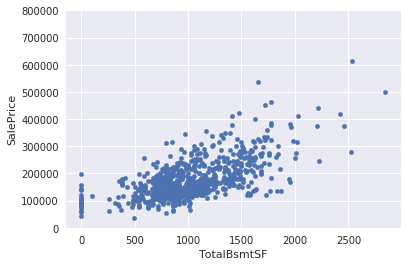

In [23]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* An option may be deleting those points greater than 2500 for basement area. However, they do seem to be following the genreal trend. Hence, we won't touch them.

## 6. Assumptions of MLR
We will also have a look at some of the assumptions of the MLR model before we start our model evaluation. If we find any problems we can fix them now (by transformations or removing the predictor from the model).

* Normality
* Homoscedasticity
* Linearity
* Absence of correlated errors

### 6.1 Normality

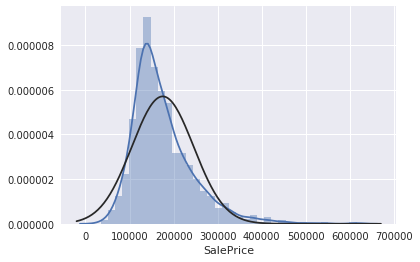

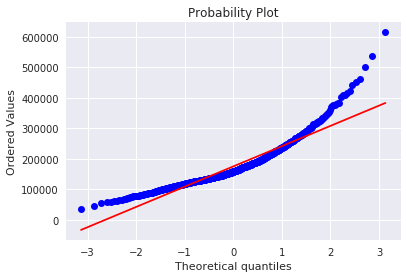

In [24]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

* 'SalePrice is not normal as we already knew
* Right tailed and positively skewed (also some left tailing)
* We can transform the data to fix this. We will show it here but will properly do it in the feature engineering and data preprocessing section

In [25]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

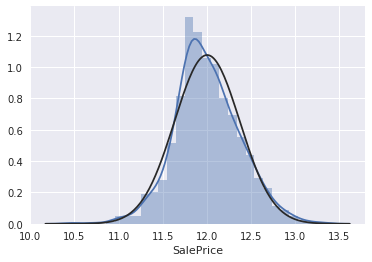

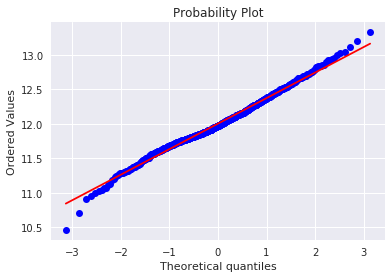

In [26]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

* Much better as you can see
* Lets also have a look at 'GrLivArea'

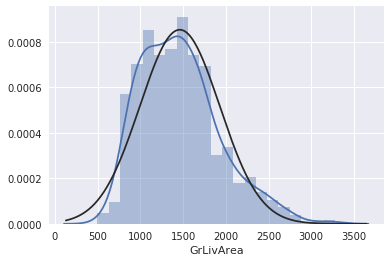

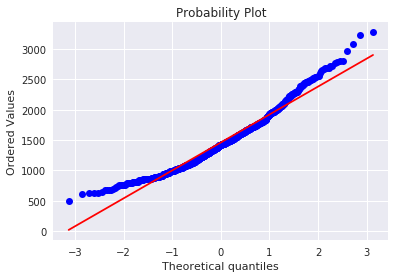

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Lets transform this too

In [28]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

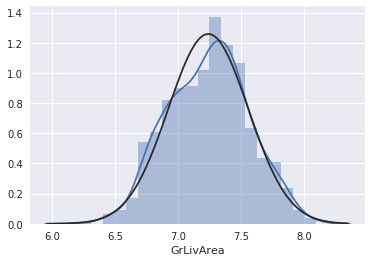

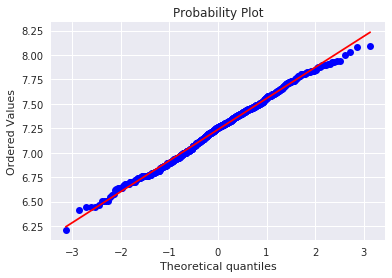

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Also doing basement area

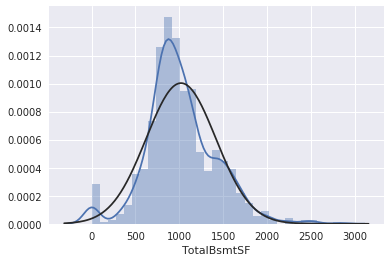

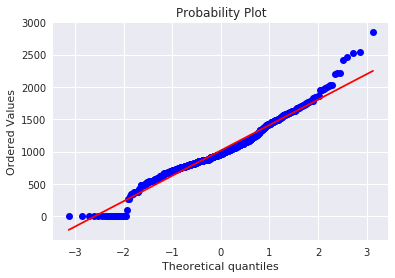

In [30]:
#histogram and normal probability plot for basement area
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

We will have to check if this is the correct approach. I'm not really sure how good it is

In [31]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [32]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

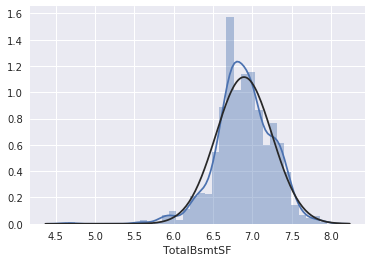

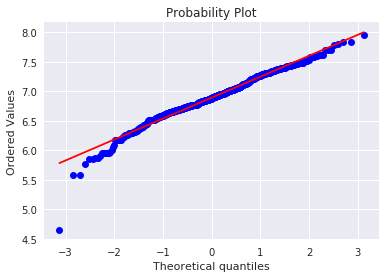

In [33]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

** In reality, I'm going to automate this entire process. I'll just log transform everything which has a skewness of say greater than 0.5. This will be in the data preprocessing section **

### 6.2 Constant Error Variance

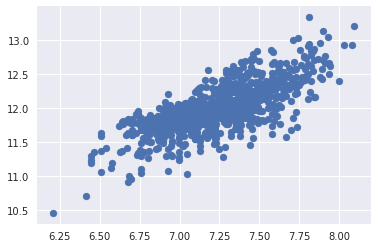

In [34]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [37]:
predictor=df_train['SalePrice']
reg = smf.ols(formula='SalePrice ~ GrLivArea', data=df_train).fit()
residuals=reg.resid

fig, ax= plt.subplots(2,2, figsize=(14,10))

sns.regplot(predictor, residuals, fit_reg=False, ax=ax[0,0])
ax[0,0].set_xlabel('Predictor')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Predictor vs residuals')

sns.regplot(predictor, residuals**2, fit_reg=False, ax=ax[0,1])
ax[0,1].set_xlabel('Predictor')
ax[0,1].set_ylabel('Squared residuals')
ax[0,1].set_title('Predictor vs squared residuals')

sns.distplot(residuals, ax=ax[1,0], hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[1,0].set(title='Residual histogram')

pp = sm.ProbPlot(residuals, fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,1])
a=ax[1,1].get_xlim()[0]
b=ax[1,1].get_xlim()[1]
ax[1,1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,1].set_xlim(a,b)
ax[1,1].set_title('Normal Q-Q plot for the residuals')

plt.show()

NameError: name 'smf' is not defined

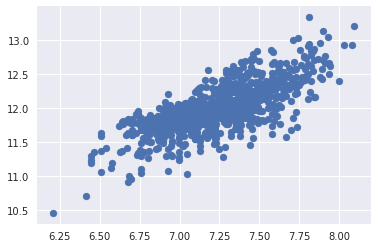

In [35]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

* If you compare to the previous scatter plots in earlier sections you can see our log transformation has fixed the issue of non constant error variance. This should be fine like this.

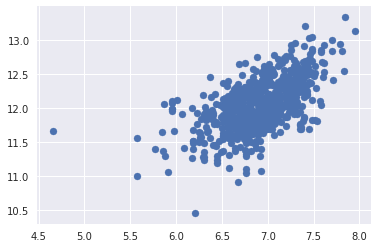

In [36]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

* In general, we say that there is constant error variance
* However, that point at like 4.5 on the x-axis doesn't look too good. We can just ignore that for now.

## Things to Add
https://www.kaggle.com/xchmiao/detailed-data-exploration-in-python

Use this link to find more detailed plots. These can go in the appendix of this report. 